Step: 250
Action: 0
Reward: 0
Done: False
Enforced NO-OP: True


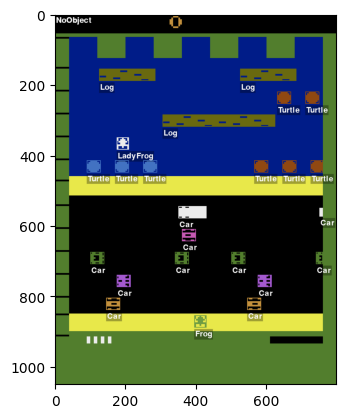

Step: 251
Action: 0
Reward: 0
Done: False
Enforced NO-OP: False


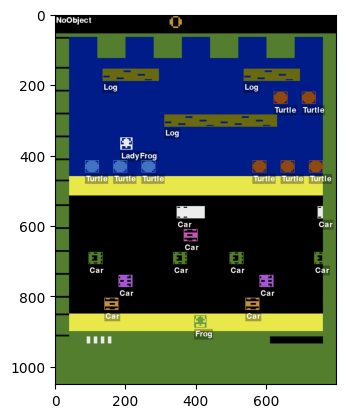

Step: 252
Action: 0
Reward: 0
Done: False
Enforced NO-OP: True


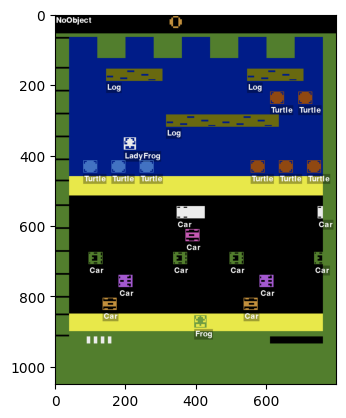

Step: 253
Action: 0
Reward: 0
Done: False
Enforced NO-OP: False


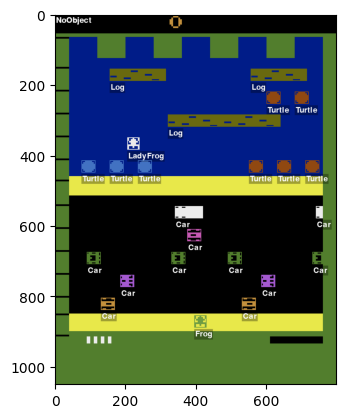

Step: 254
Action: 0
Reward: 0
Done: False
Enforced NO-OP: True


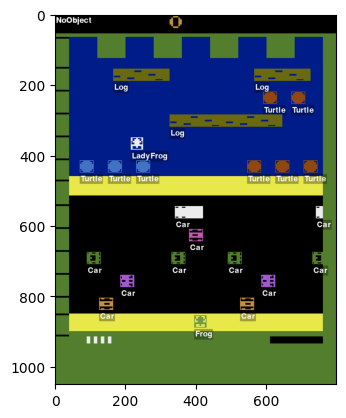

Step: 255
Action: 0
Reward: 0
Done: False
Enforced NO-OP: False


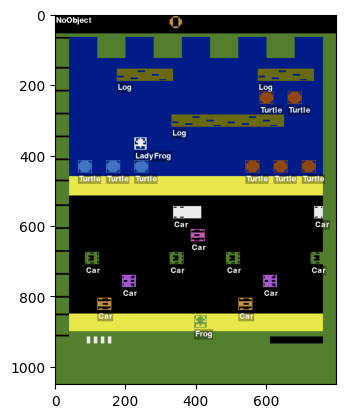

Step: 256
Action: 0
Reward: 0
Done: False
Enforced NO-OP: True


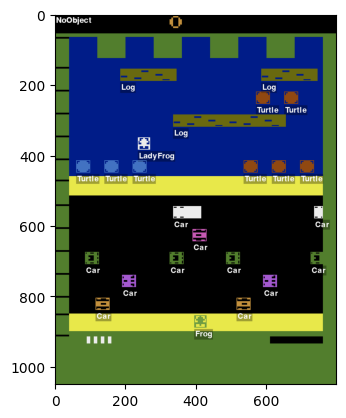

Step: 257
Action: 0
Reward: 0
Done: False
Enforced NO-OP: False


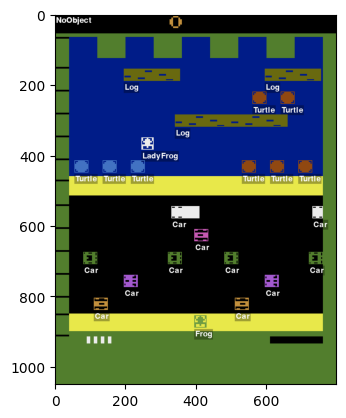

In [24]:
import json
import matplotlib.pyplot as plt
from PIL import Image
from utils import base64_to_numpy

with open('traces/o3-mini-2025-01-31_low_past_0_rewards_hide_seed_1_temp_1.0.json') as f:
    trace = json.load(f)

for step, t in enumerate(trace):
    if step < 250:
        continue
    print(f'Step: {step}')
    print(f"Action: {t['action']}")
    # print(f"Objs: {t['objs']}")
    print(f"Reward: {t['reward']}")
    print(f"Done: {t['done']}")
    print(f"Enforced NO-OP: {t['enforced_noop']}")
    if 'llm_input' in t:
        print(f"LLM input: {t['llm_input']}")
        print(f"LLM output: {json.dumps(t['llm_output'], indent=4)}")
    # plt.figure()
    # plt.imshow(base64_to_numpy(t['state']))
    # plt.show()
    plt.figure()
    plt.imshow(base64_to_numpy(t['frame']))
    plt.show()
    if step > 256:
        break

In [4]:
model='o3-mini-2025-01-31'
temperature=1.0
max_steps=1000

import json

for reasoning_effort in ['low', 'medium', 'high']:
        for past_steps in [0, 3, 'all']:
            for show_rewards in [False, True]:
                for seed in [1]:
                    output_file_name = f'traces/{model}_{reasoning_effort}_past_{past_steps}_rewards_{"show" if show_rewards else "hide"}_seed_{seed}_temp_{temperature}.json'
                    with open(output_file_name) as f:
                        trace = json.load(f)
                        print(output_file_name)
                        print(sum(t['reward'] for t in trace))
                        print(len(trace))

traces/o3-mini-2025-01-31_low_past_0_rewards_hide_seed_1_temp_1.0.json
39.0
564
traces/o3-mini-2025-01-31_low_past_0_rewards_show_seed_1_temp_1.0.json
58.0
826
traces/o3-mini-2025-01-31_low_past_3_rewards_hide_seed_1_temp_1.0.json
70.0
1000
traces/o3-mini-2025-01-31_low_past_3_rewards_show_seed_1_temp_1.0.json
4.0
140
traces/o3-mini-2025-01-31_low_past_all_rewards_hide_seed_1_temp_1.0.json
8.0
180
traces/o3-mini-2025-01-31_low_past_all_rewards_show_seed_1_temp_1.0.json
72.0
1000
traces/o3-mini-2025-01-31_medium_past_0_rewards_hide_seed_1_temp_1.0.json
35.0
414
traces/o3-mini-2025-01-31_medium_past_0_rewards_show_seed_1_temp_1.0.json
0.0
110
traces/o3-mini-2025-01-31_medium_past_3_rewards_hide_seed_1_temp_1.0.json
113.0
1000
traces/o3-mini-2025-01-31_medium_past_3_rewards_show_seed_1_temp_1.0.json
114.0
1000
traces/o3-mini-2025-01-31_medium_past_all_rewards_hide_seed_1_temp_1.0.json
89.0
1000
traces/o3-mini-2025-01-31_medium_past_all_rewards_show_seed_1_temp_1.0.json
74.0
1000
traces/o3

In [3]:
# Reconstruct trace
from utils import base64_to_numpy, frames_to_video
for reasoning_effort in ['low', 'medium', 'high']:
        for past_steps in [0, 3, 'all']:
            for show_rewards in [False, True]:
                for seed in [1]:
                    n = f'{model}_{reasoning_effort}_past_{past_steps}_rewards_{"show" if show_rewards else "hide"}_seed_{seed}_temp_{temperature}'
                    with open(f'traces/{n}.json', 'r') as f:
                        trace = json.load(f)
                        frames = []
                        for t in trace:
                            image = base64_to_numpy(t['frame'])
                            frames.append(image)
                        frames_to_video(video_folder='traces', video_name=n, frames=frames, fps=15)

MoviePy - Building video traces/o3-mini-2025-01-31_low_past_0_rewards_hide_seed_1_temp_1.0.mp4.
MoviePy - Writing video traces/o3-mini-2025-01-31_low_past_0_rewards_hide_seed_1_temp_1.0.mp4



MoviePy - Done !
MoviePy - video ready traces/o3-mini-2025-01-31_low_past_0_rewards_hide_seed_1_temp_1.0.mp4
MoviePy - Building video traces/o3-mini-2025-01-31_low_past_0_rewards_show_seed_1_temp_1.0.mp4.
MoviePy - Writing video traces/o3-mini-2025-01-31_low_past_0_rewards_show_seed_1_temp_1.0.mp4



MoviePy - Done !
MoviePy - video ready traces/o3-mini-2025-01-31_low_past_0_rewards_show_seed_1_temp_1.0.mp4
MoviePy - Building video traces/o3-mini-2025-01-31_low_past_3_rewards_hide_seed_1_temp_1.0.mp4.
MoviePy - Writing video traces/o3-mini-2025-01-31_low_past_3_rewards_hide_seed_1_temp_1.0.mp4



MoviePy - Done !
MoviePy - video ready traces/o3-mini-2025-01-31_low_past_3_rewards_hide_seed_1_temp_1.0.mp4
MoviePy - Building video traces/o3-mini-2025-01-31_low_past_3_rewards_show_seed_1_temp_1.0.mp4.
MoviePy - Writing video traces/o3-mini-2025-01-31_low_past_3_rewards_show_seed_1_temp_1.0.mp4



MoviePy - Done !
MoviePy - video ready traces/o3-mini-2025-01-31_low_past_3_rewards_show_seed_1_temp_1.0.mp4
MoviePy - Building video traces/o3-mini-2025-01-31_low_past_all_rewards_hide_seed_1_temp_1.0.mp4.
MoviePy - Writing video traces/o3-mini-2025-01-31_low_past_all_rewards_hide_seed_1_temp_1.0.mp4



MoviePy - Done !
MoviePy - video ready traces/o3-mini-2025-01-31_low_past_all_rewards_hide_seed_1_temp_1.0.mp4
MoviePy - Building video traces/o3-mini-2025-01-31_low_past_all_rewards_show_seed_1_temp_1.0.mp4.
MoviePy - Writing video traces/o3-mini-2025-01-31_low_past_all_rewards_show_seed_1_temp_1.0.mp4



MoviePy - Done !
MoviePy - video ready traces/o3-mini-2025-01-31_low_past_all_rewards_show_seed_1_temp_1.0.mp4
MoviePy - Building video traces/o3-mini-2025-01-31_medium_past_0_rewards_hide_seed_1_temp_1.0.mp4.
MoviePy - Writing video traces/o3-mini-2025-01-31_medium_past_0_rewards_hide_seed_1_temp_1.0.mp4



MoviePy - Done !
MoviePy - video ready traces/o3-mini-2025-01-31_medium_past_0_rewards_hide_seed_1_temp_1.0.mp4
MoviePy - Building video traces/o3-mini-2025-01-31_medium_past_0_rewards_show_seed_1_temp_1.0.mp4.
MoviePy - Writing video traces/o3-mini-2025-01-31_medium_past_0_rewards_show_seed_1_temp_1.0.mp4



MoviePy - Done !
MoviePy - video ready traces/o3-mini-2025-01-31_medium_past_0_rewards_show_seed_1_temp_1.0.mp4
MoviePy - Building video traces/o3-mini-2025-01-31_medium_past_3_rewards_hide_seed_1_temp_1.0.mp4.
MoviePy - Writing video traces/o3-mini-2025-01-31_medium_past_3_rewards_hide_seed_1_temp_1.0.mp4



MoviePy - Done !
MoviePy - video ready traces/o3-mini-2025-01-31_medium_past_3_rewards_hide_seed_1_temp_1.0.mp4
MoviePy - Building video traces/o3-mini-2025-01-31_medium_past_3_rewards_show_seed_1_temp_1.0.mp4.
MoviePy - Writing video traces/o3-mini-2025-01-31_medium_past_3_rewards_show_seed_1_temp_1.0.mp4



MoviePy - Done !
MoviePy - video ready traces/o3-mini-2025-01-31_medium_past_3_rewards_show_seed_1_temp_1.0.mp4
MoviePy - Building video traces/o3-mini-2025-01-31_medium_past_all_rewards_hide_seed_1_temp_1.0.mp4.
MoviePy - Writing video traces/o3-mini-2025-01-31_medium_past_all_rewards_hide_seed_1_temp_1.0.mp4



MoviePy - Done !
MoviePy - video ready traces/o3-mini-2025-01-31_medium_past_all_rewards_hide_seed_1_temp_1.0.mp4
MoviePy - Building video traces/o3-mini-2025-01-31_medium_past_all_rewards_show_seed_1_temp_1.0.mp4.
MoviePy - Writing video traces/o3-mini-2025-01-31_medium_past_all_rewards_show_seed_1_temp_1.0.mp4



MoviePy - Done !
MoviePy - video ready traces/o3-mini-2025-01-31_medium_past_all_rewards_show_seed_1_temp_1.0.mp4
MoviePy - Building video traces/o3-mini-2025-01-31_high_past_0_rewards_hide_seed_1_temp_1.0.mp4.
MoviePy - Writing video traces/o3-mini-2025-01-31_high_past_0_rewards_hide_seed_1_temp_1.0.mp4



MoviePy - Done !
MoviePy - video ready traces/o3-mini-2025-01-31_high_past_0_rewards_hide_seed_1_temp_1.0.mp4
MoviePy - Building video traces/o3-mini-2025-01-31_high_past_0_rewards_show_seed_1_temp_1.0.mp4.
MoviePy - Writing video traces/o3-mini-2025-01-31_high_past_0_rewards_show_seed_1_temp_1.0.mp4



MoviePy - Done !
MoviePy - video ready traces/o3-mini-2025-01-31_high_past_0_rewards_show_seed_1_temp_1.0.mp4
MoviePy - Building video traces/o3-mini-2025-01-31_high_past_3_rewards_hide_seed_1_temp_1.0.mp4.
MoviePy - Writing video traces/o3-mini-2025-01-31_high_past_3_rewards_hide_seed_1_temp_1.0.mp4



MoviePy - Done !
MoviePy - video ready traces/o3-mini-2025-01-31_high_past_3_rewards_hide_seed_1_temp_1.0.mp4
MoviePy - Building video traces/o3-mini-2025-01-31_high_past_3_rewards_show_seed_1_temp_1.0.mp4.
MoviePy - Writing video traces/o3-mini-2025-01-31_high_past_3_rewards_show_seed_1_temp_1.0.mp4



MoviePy - Done !
MoviePy - video ready traces/o3-mini-2025-01-31_high_past_3_rewards_show_seed_1_temp_1.0.mp4
MoviePy - Building video traces/o3-mini-2025-01-31_high_past_all_rewards_hide_seed_1_temp_1.0.mp4.
MoviePy - Writing video traces/o3-mini-2025-01-31_high_past_all_rewards_hide_seed_1_temp_1.0.mp4



MoviePy - Done !
MoviePy - video ready traces/o3-mini-2025-01-31_high_past_all_rewards_hide_seed_1_temp_1.0.mp4
MoviePy - Building video traces/o3-mini-2025-01-31_high_past_all_rewards_show_seed_1_temp_1.0.mp4.
MoviePy - Writing video traces/o3-mini-2025-01-31_high_past_all_rewards_show_seed_1_temp_1.0.mp4



MoviePy - Done !
MoviePy - video ready traces/o3-mini-2025-01-31_high_past_all_rewards_show_seed_1_temp_1.0.mp4
